In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
path = r"F:\Work\machine learning\data_one_variable_reg.txt"
data_frame = pd.read_csv(path)
data_frame.head()

,6.1101,17.592
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


In [3]:
df = data_frame.copy()
df

,6.1101,17.592
0,5.5277,9.13020
1,8.5186,13.66200
2,7.0032,11.85400
3,5.8598,6.82330
4,8.3829,11.88600
...,...,...
91,5.8707,7.20290
92,5.3054,1.98690
93,8.2934,0.14454
94,13.3940,9.05510


In [4]:
df.columns

Index(['6.1101', '17.592'], dtype='object')

In [5]:
df.columns = ["Population","Profits"]

In [6]:
df

,Population,Profits
0,5.5277,9.13020
1,8.5186,13.66200
2,7.0032,11.85400
3,5.8598,6.82330
4,8.3829,11.88600
...,...,...
91,5.8707,7.20290
92,5.3054,1.98690
93,8.2934,0.14454
94,13.3940,9.05510


In [7]:
df.insert(0,"Ones",1)

In [8]:
df

,Ones,Population,Profits
0,1,5.5277,9.13020
1,1,8.5186,13.66200
2,1,7.0032,11.85400
3,1,5.8598,6.82330
4,1,8.3829,11.88600
...,...,...,...
91,1,5.8707,7.20290
92,1,5.3054,1.98690
93,1,8.2934,0.14454
94,1,13.3940,9.05510


<Axes: >

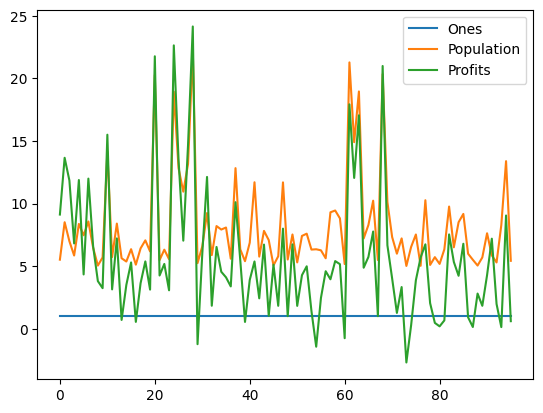

In [9]:
df.plot()

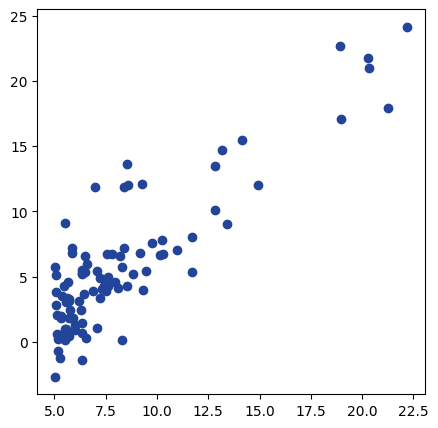

In [10]:
x = df["Population"]
y = df["Profits"]
plt.figure(figsize=(5,5))
plt.plot(x,y ,color = "#224499",marker = "o",ls="")
plt.show()
plt.close()

In [11]:
df

,Ones,Population,Profits
0,1,5.5277,9.13020
1,1,8.5186,13.66200
2,1,7.0032,11.85400
3,1,5.8598,6.82330
4,1,8.3829,11.88600
...,...,...,...
91,1,5.8707,7.20290
92,1,5.3054,1.98690
93,1,8.2934,0.14454
94,1,13.3940,9.05510


In [12]:
cols = df.shape[1]
x = df.iloc[:,0:cols-1]
y = df.iloc[:,cols-1:cols]
y

,Profits
0,9.13020
1,13.66200
2,11.85400
3,6.82330
4,11.88600
...,...
91,7.20290
92,1.98690
93,0.14454
94,9.05510


In [13]:
X = np.matrix(x)
Y = np.matrix(y)
theta = np.matrix(np.array([0,0]))
x.shape

(96, 2)

In [14]:
Y

matrix([[ 9.1302 ],
        [13.662  ],
        [11.854  ],
        [ 6.8233 ],
        [11.886  ],
        [ 4.3483 ],
        [12.     ],
        [ 6.5987 ],
        [ 3.8166 ],
        [ 3.2522 ],
        [15.505  ],
        [ 3.1551 ],
        [ 7.2258 ],
        [ 0.71618],
        [ 3.5129 ],
        [ 5.3048 ],
        [ 0.56077],
        [ 3.6518 ],
        [ 5.3893 ],
        [ 3.1386 ],
        [21.767  ],
        [ 4.263  ],
        [ 5.1875 ],
        [ 3.0825 ],
        [22.638  ],
        [13.501  ],
        [ 7.0467 ],
        [14.692  ],
        [24.147  ],
        [-1.22   ],
        [ 5.9966 ],
        [12.134  ],
        [ 1.8495 ],
        [ 6.5426 ],
        [ 4.5623 ],
        [ 4.1164 ],
        [ 3.3928 ],
        [10.117  ],
        [ 5.4974 ],
        [ 0.55657],
        [ 3.9115 ],
        [ 5.3854 ],
        [ 2.4406 ],
        [ 6.7318 ],
        [ 1.0463 ],
        [ 5.1337 ],
        [ 1.844  ],
        [ 8.0043 ],
        [ 1.0179 ],
        [ 6.7504 ],


In [15]:
# theta = [0,0]
def cost_fun(x,y,theta):
    z = np.power(( (x * theta.T) - y ),2)
    #print(z)
    return np.sum(z) / (2 * len(x))

# cost function

In [16]:
alpha = 0.01
iterations = 10000
def Greadient_Descent(x,y,theta,alpha,iterations):
    temp = np.matrix(np.zeros(theta.shape))
    theta_changers = int(theta.ravel().shape[1]) 
    cost = np.zeros(iterations)
    
    for i in range(iterations):
        error = ((x * theta.T) - y) * 1
        
        for j in range(theta_changers):
            term = np.multiply(error, x[ : ,j ])
            temp[0,j] = theta[0,j] - ( alpha / len(x) * np.sum(term) )
        
        theta = temp
        cost[i] = cost_fun(x, y , theta)
    
    return theta , cost



g , cost = Greadient_Descent(X,Y, theta,alpha,iterations)


new_thetas_after_GD = g  # thetas after 1000 iterations

new_thetas_after_GD

matrix([[-4.21150394,  1.21354725]])

In [17]:
print("the real cost",cost_fun(X,Y,new_thetas_after_GD))

the real cost 3.459581903158004


In [18]:
cost[0:1000]

array([5.90146939, 5.14906372, 5.12066681, 5.11400388, 5.10801371,
       5.10206461, 5.09613757, 5.09023193, 5.0843476 , 5.07848451,
       5.07264258, 5.06682172, 5.06102187, 5.05524295, 5.04948488,
       5.0437476 , 5.03803101, 5.03233505, 5.02665965, 5.02100473,
       5.01537022, 5.00975603, 5.00416211, 4.99858837, 4.99303475,
       4.98750116, 4.98198755, 4.97649383, 4.97101993, 4.96556579,
       4.96013133, 4.95471648, 4.94932117, 4.94394533, 4.93858889,
       4.93325178, 4.92793393, 4.92263527, 4.91735573, 4.91209524,
       4.90685373, 4.90163114, 4.89642739, 4.89124242, 4.88607616,
       4.88092855, 4.87579951, 4.87068898, 4.86559689, 4.86052317,
       4.85546777, 4.85043061, 4.84541162, 4.84041075, 4.83542792,
       4.83046307, 4.82551614, 4.82058706, 4.81567577, 4.8107822 ,
       4.80590629, 4.80104797, 4.79620718, 4.79138387, 4.78657796,
       4.78178939, 4.7770181 , 4.77226403, 4.76752711, 4.76280729,
       4.7581045 , 4.75341868, 4.74874977, 4.74409771, 4.73946

In [19]:
line_x = np.linspace(df.Population.min(), df.Population.max(),100 )
line_x

array([ 5.0269    ,  5.20039596,  5.37389192,  5.54738788,  5.72088384,
        5.8943798 ,  6.06787576,  6.24137172,  6.41486768,  6.58836364,
        6.7618596 ,  6.93535556,  7.10885152,  7.28234747,  7.45584343,
        7.62933939,  7.80283535,  7.97633131,  8.14982727,  8.32332323,
        8.49681919,  8.67031515,  8.84381111,  9.01730707,  9.19080303,
        9.36429899,  9.53779495,  9.71129091,  9.88478687, 10.05828283,
       10.23177879, 10.40527475, 10.57877071, 10.75226667, 10.92576263,
       11.09925859, 11.27275455, 11.44625051, 11.61974646, 11.79324242,
       11.96673838, 12.14023434, 12.3137303 , 12.48722626, 12.66072222,
       12.83421818, 13.00771414, 13.1812101 , 13.35470606, 13.52820202,
       13.70169798, 13.87519394, 14.0486899 , 14.22218586, 14.39568182,
       14.56917778, 14.74267374, 14.9161697 , 15.08966566, 15.26316162,
       15.43665758, 15.61015354, 15.78364949, 15.95714545, 16.13064141,
       16.30413737, 16.47763333, 16.65112929, 16.82462525, 16.99

In [20]:
best_fit_line_eq = new_thetas_after_GD[0,0] + (new_thetas_after_GD[0,1] * line_x)
best_fit_line_eq

array([ 1.88887672,  2.09942226,  2.3099678 ,  2.52051335,  2.73105889,
        2.94160444,  3.15214998,  3.36269553,  3.57324107,  3.78378661,
        3.99433216,  4.2048777 ,  4.41542325,  4.62596879,  4.83651434,
        5.04705988,  5.25760542,  5.46815097,  5.67869651,  5.88924206,
        6.0997876 ,  6.31033315,  6.52087869,  6.73142423,  6.94196978,
        7.15251532,  7.36306087,  7.57360641,  7.78415196,  7.9946975 ,
        8.20524304,  8.41578859,  8.62633413,  8.83687968,  9.04742522,
        9.25797077,  9.46851631,  9.67906185,  9.8896074 , 10.10015294,
       10.31069849, 10.52124403, 10.73178958, 10.94233512, 11.15288066,
       11.36342621, 11.57397175, 11.7845173 , 11.99506284, 12.20560839,
       12.41615393, 12.62669947, 12.83724502, 13.04779056, 13.25833611,
       13.46888165, 13.67942719, 13.88997274, 14.10051828, 14.31106383,
       14.52160937, 14.73215492, 14.94270046, 15.153246  , 15.36379155,
       15.57433709, 15.78488264, 15.99542818, 16.20597373, 16.41

PLOTING BEST FIT LINE 

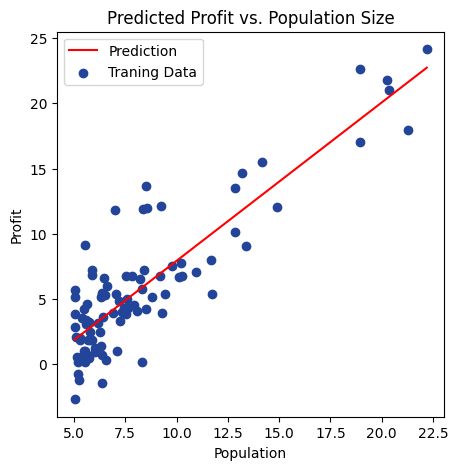

In [21]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(line_x, best_fit_line_eq, 'r', label='Prediction')
ax.scatter(df.Population, df.Profits, label='Traning Data', color = "#224499")
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

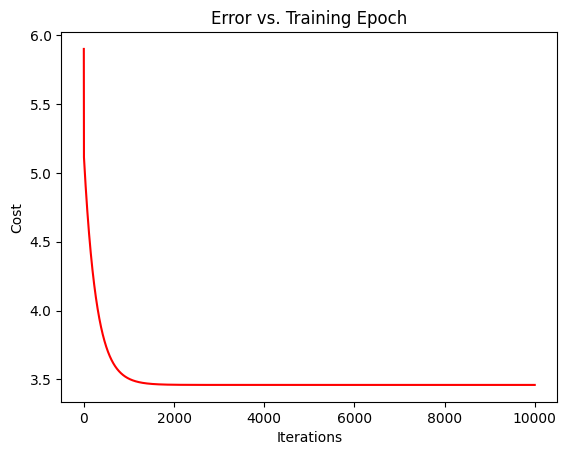

In [22]:
plt.plot(np.arange(iterations), cost, 'r')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Error vs. Training Epoch')
plt.show()
